<a href="https://colab.research.google.com/github/monaejam/Datasets/blob/master/feature_selection%20project%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from google.colab import files
uploaded = files.upload()

Saving credit.csv to credit (2).csv


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%pylab inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline





Populating the interactive namespace from numpy and matplotlib


In [161]:
import io
dm = pd.read_csv(io.BytesIO(uploaded['credit.csv']))


In [162]:
for i in range(len(dm['personal_status'])):
    if str(dm['personal_status'][i]).startswith("m"):
        dm['personal_status'][i] = '1'
    else:
        dm['personal_status'][i] ='0'

dm['personal_status'] = dm.personal_status.astype(int64)
dm.copy()
for i in range(len(dm['checking_status'])):
    if dm['checking_status'][i] == 'no checking':
        dm['checking_status'][i] = '0'
    elif dm['checking_status'][i] == '<0':
        dm['checking_status'][i] ='1'
    elif dm['checking_status'][i] == '0<=X<200':
        dm['checking_status'][i] = '2'
    elif dm['checking_status'][i] == '>=200':
        dm['checking_status'][i] ='3'
le = preprocessing.LabelEncoder()
dm['checking_status'] = le.fit_transform(dm['checking_status'])        

dm ['other_parties'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['other_parties'],dtype='int', prefix='parties')],axis=1)
dm.drop(['other_parties'],axis=1, inplace=True)

dm ['credit_history'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['credit_history'],dtype='int', prefix='credit_h')],axis=1)
dm.drop(['credit_history'],axis=1, inplace=True)

dm ['purpose'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['purpose'],dtype='int', prefix='purpose')],axis=1)
dm.drop(['purpose'],axis=1, inplace=True)
    
dm.copy()
dm ['savings_status'].unique()
for j in range(len(dm['savings_status'])):
    if dm['savings_status'][j] == 'no known savings':
        dm['savings_status'][j] = '0'
    elif dm['savings_status'][j] == '<100':
        dm['savings_status'][j] ='1'
    elif dm['savings_status'][j] == '100<=X<500':
        dm['savings_status'][j] = '2'
    elif dm['savings_status'][j] == '500<=X<1000':
        dm['savings_status'][j] ='3'
    elif dm['savings_status'][j] == '>=1000':
        dm['savings_status'][j] ='4'
le = preprocessing.LabelEncoder()
dm['savings_status'] = le.fit_transform(dm['savings_status'])  

# labelencoding of employment column
dm.copy()
dm ['employment'].unique()
for k in range(len(dm['savings_status'])):
    if dm['employment'][k] == 'unemployed':
        dm['employment'][k] = '0'
    elif dm['employment'][k] == '<1':
        dm['employment'][k] ='1'
    elif dm['employment'][k] == '1<=X<4':
        dm['employment'][k] = '2'
    elif dm['employment'][k] == '4<=X<7':
        dm['employment'][k] ='3'
    elif dm['employment'][k] == '>=7':
        dm['employment'][k] ='4'
le = preprocessing.LabelEncoder()
dm['employment'] = le.fit_transform(dm['employment'])  

#dm ['personal_status'].unique()
#dm = pd.concat([dm,pd.get_dummies(dm['personal_status'],dtype='int', prefix='status')],axis=1)
#dm.drop(['personal_status'],axis=1, inplace=True)

dm['class'].unique()
labelencoder = LabelEncoder()
dm['class_new'] = labelencoder.fit_transform(dm['class'])
dm.drop(['class'],axis=1, inplace=True)

dm['foreign_worker'].unique()
labelencoder = LabelEncoder()
dm['foreign_worker_new'] = labelencoder.fit_transform(dm['foreign_worker'])
dm.drop(['foreign_worker'],axis=1, inplace=True)

dm['own_telephone'].unique()
labelencoder = LabelEncoder()
dm['own_telephone_new'] = labelencoder.fit_transform(dm['own_telephone'])
dm.drop(['own_telephone'],axis=1, inplace=True)

dm ['job'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['job'],dtype='int', prefix='job_status')],axis=1)
dm.drop(['job'],axis=1, inplace=True)

dm ['housing'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['housing'],dtype='int',prefix='housing_status')],axis=1)
dm.drop(['housing'],axis=1, inplace=True)


dm['other_payment_plans'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['other_payment_plans'],dtype='int', prefix='payment_plans_status')],axis=1)
dm.drop(['other_payment_plans'],axis=1, inplace=True)

dm['property_magnitude'].unique()
dm = pd.concat([dm,pd.get_dummies(dm['property_magnitude'],dtype='int', prefix='property_magnitude_status')],axis=1)
dm.drop(['property_magnitude'],axis=1, inplace=True)
dc = dm.drop(['class_new'],axis=1)


In [163]:
# All scores classifier
groups = []
mean_cv_test_score = []
test_score = []
mean_cv_train_score =[]
mae_score_test = []


-------------------------------------------  ------------
checking_status                              -0.334572
credit_amount                                -0.000124545
savings_status                                0.188014
installment_commitment                       -0.321657
personal_status                               0.518961
age                                           0.0419003
num_dependents                                0.0713922
parties_co applicant                         -0.00985348
parties_guarantor                             0.165236
parties_none                                  0.0801797
credit_h_all paid                            -0.370431
credit_h_critical/other existing credit       0.846433
credit_h_delayed previously                   0.156012
credit_h_existing paid                        0.0018477
credit_h_no credits/all paid                 -0.398299
purpose_domestic appliance                   -0.0397837
purpose_education                            -0.2703

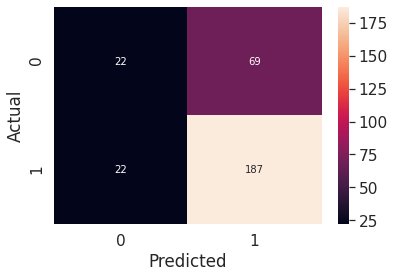

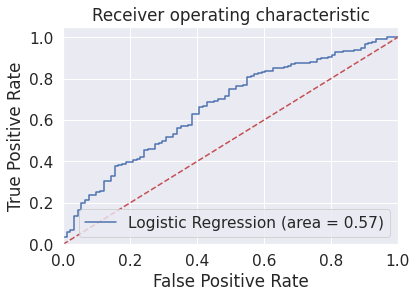

Optimization terminated successfully.
         Current function value: 0.497017
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              class_new   No. Observations:                  700
Model:                          Logit   Df Residuals:                      669
Method:                           MLE   Df Model:                           30
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.1847
Time:                        17:24:08   Log-Likelihood:                -347.91
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 2.864e-19
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
checking_status                           

In [164]:
# logistic model
from mlxtend.feature_selection import SequentialFeatureSelector
logmodel = LogisticRegression()

ffs = SequentialFeatureSelector(logmodel, k_features ='best', forward = True, n_jobs = -1)
ffs.fit(dc,dm['class_new'])
features = list(ffs.k_feature_names_)
dt = dm[features]
X_train, X_test, y_train, y_test =train_test_split(dt,dm['class_new'],test_size = 0.30, random_state =42)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
# printing the values of feature selected
logmodel.coef_
names_f = []
for i in range (len(dt.columns)):
  names_f.append([dt.columns[i], logmodel.coef_[0,i]])
print(tabulate(names_f))
# confusion matrix
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 10},fmt='g')
#ROC CURVE
logmodel_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#printing results for logistic regression
log_model=sm.Logit(y_train,X_train).fit()
result_1=log_model
print(result_1.summary())
# test model

score44 = logmodel.score(X_test,y_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

In [165]:
# applyting gridsearch on the score to get better values 
# Choose the best parameters for our linear regression 
parameters_log = [{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                    'C' :[100, 10, 1.0, 0.1, 0.01]}]
                
# Instantiate grid search cv and pass the parameter
GridModel = GridSearchCV(LogisticRegression(), parameters_log, scoring = 'accuracy',return_train_score=True)
print(GridModel)

GridModel.fit(X_train, y_train)
gridmodel_predictions=GridModel.predict(X_test)

score1 =np.mean (GridModel.cv_results_['mean_test_score'])
print(score1)
# Average Cv train score
score2 = np.mean (GridModel.cv_results_['mean_train_score'])
print(score2)
 #Test score 
score3 = GridModel.score(X_test,y_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
GridModel.best_estimator_
# Mean absolute error
score4 = mean_absolute_error(y_test,y_pred)
print(score4)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)
0.7211428571428572
0.7472619047619047
Accuracy:  0.6966666666666667
0.30333333333333334


In [166]:
# Append for graphing 
groups.append('Logistic Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
test_score.append(score3)
mae_score_test.append(score4)

In [167]:
#Ridge Model with the best alpha
ridge3 = Ridge()

# Ridge feature selection

from mlxtend.feature_selection import SequentialFeatureSelector
ffs = SequentialFeatureSelector(ridge3, k_features ='best', forward = True, n_jobs = -1)
ffs.fit(dc,dm['class_new'])
features = list(ffs.k_feature_names_)
print(features)
dt = dm[features]
X_train, X_test, y_train, y_test =train_test_split(dt,dm['class_new'],test_size = 0.30, random_state =42)
ridge3.fit(X_train,y_train)
y_pred = ridge3.predict(X_test)
#print Coefficinet       
print(pd.Series(ridge3.coef_)) 
print(mean_squared_error(y_test, y_pred))
print('Mean of sum of the squared error on test set: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))
print(' The value of R Squared on test set: {:.2f}'.format(r2_score(y_test, y_pred)))




['checking_status', 'duration', 'credit_amount', 'employment', 'installment_commitment', 'parties_guarantor', 'credit_h_all paid', 'credit_h_critical/other existing credit', 'credit_h_no credits/all paid', 'purpose_education', 'purpose_furniture/equipment', 'purpose_new car', 'purpose_repairs', 'purpose_used car', 'foreign_worker_new', 'own_telephone_new', 'job_status_unemp/unskilled non res', 'housing_status_rent', 'payment_plans_status_none', 'property_magnitude_status_car', 'property_magnitude_status_real estate']
0    -0.063106
1    -0.004228
2    -0.000017
3     0.035464
4    -0.047897
5     0.063630
6    -0.150067
7     0.123108
8    -0.238107
9    -0.227263
10   -0.004668
11   -0.176934
12   -0.058579
13    0.085680
14   -0.147037
15    0.072733
16    0.110971
17   -0.101854
18    0.046865
19    0.044725
20    0.092340
dtype: float64
0.17399114846973607
Mean of sum of the squared error on test set: 0.17
0.1766547472382225
 The value of R Squared on test set: 0.18


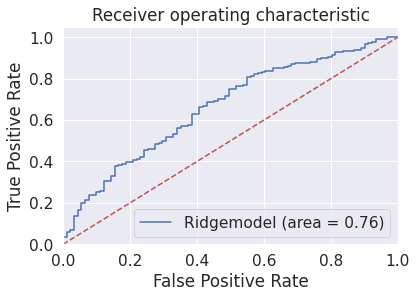

In [168]:
# ROC curve
Ridgemodel_roc_auc = roc_auc_score(y_test, ridge3.predict(X_test))
plt.figure()

plt.plot(fpr, tpr, label='Ridgemodel (area = %0.2f)' % Ridgemodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [169]:
#Doing Cross validation on Ridge to get the best alpha

parameters = {'alpha':[1, 10]}
model = Ridge()
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5, return_train_score=True)
Ridge_reg.fit(X_train, y_train)
print(Ridge_reg.best_estimator_)
grid_predictions=Ridge_reg.predict(X_test)

# Reporting all the scores for the model
#Average CV test Score 
score1 =np.mean (Ridge_reg.cv_results_['mean_test_score'])
print(score1)
# Average Cv train score
score2 = np.mean(Ridge_reg.cv_results_['mean_train_score'])
print(score2)
# Tesst score
score3 = ridge3.score(X_test,y_test)
print(score3)
Ridge_reg.best_estimator_
# Mean absolute error
score4 = mean_absolute_error(y_test,y_pred)
print(score4)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
-0.17900874735672823
-0.16647747937529656
0.1766547472382225
0.3453161841495239


In [170]:
# Append for graphing 
groups.append('Ridge Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
test_score.append(score3)
mae_score_test.append(score4)

In [171]:
# lasso feature selection
lasso_feature = SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear'))
lasso_feature.fit(X_train, y_train)

selected_feat = X_train.columns[(lasso_feature.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(lasso_feature.estimator_.coef_ == 0)))

removed_feats = X_train.columns[(lasso_feature.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

total features: 21
selected features: 19
features with coefficients shrank to zero: 2


Index(['purpose_furniture/equipment', 'purpose_repairs'], dtype='object')

In [172]:
X_train_selected = lasso_feature.transform(X_train)
X_test_selected = lasso_feature.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((700, 19), (300, 19))

In [173]:
#implement lasso on new training dataset
from sklearn import linear_model
Lasso = linear_model.Lasso()
#Fit Lasso regression on train
Lasso.fit(X_train_selected, y_train)       
#Use the lasso model to predict      
pred_Lasso = Lasso.predict(X_test_selected)   

#print Coefficinet       
print(pd.Series(Lasso.coef_)) 
print(mean_squared_error(y_test, pred_Lasso))
print('Mean of sum of the squared error on test set: {:.2f}'.format(mean_squared_error(y_test, pred_Lasso)))
print(r2_score(y_test, pred_Lasso))
print(' The value of R Squared on test set: {:.2f}'.format(r2_score(y_test, pred_Lasso)))


#Doing cross validation on lasso model 
#lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
#lassocv.fit(X_train_selected, y_train)
#Lasso.set_params(alpha=lassocv.alpha_)
#print('The best value of alpha: {:.2f}'.format(lassocv.alpha_))
#pred3 = lassocv.predict(X_test_selected)
#mean_squared_error(y_test, pred_Lasso)
#print('Mean of sum of the squared error on test set: {:.2f}'.format(mean_squared_error(y_test, pred_Lasso)))
#print(lassocv.coef_)




0    -0.000000
1    -0.000000
2    -0.000025
3     0.000000
4    -0.000000
5     0.000000
6    -0.000000
7     0.000000
8    -0.000000
9    -0.000000
10   -0.000000
11    0.000000
12   -0.000000
13    0.000000
14   -0.000000
15   -0.000000
16    0.000000
17   -0.000000
18    0.000000
dtype: float64
0.20740787835013094
Mean of sum of the squared error on test set: 0.21
0.01852310576203864
 The value of R Squared on test set: 0.02


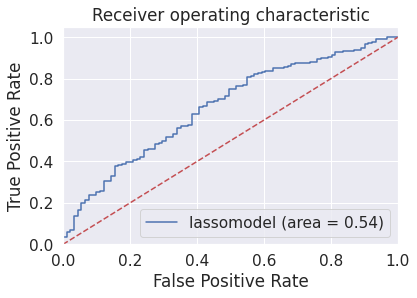

In [174]:
# Roc curve
Lassomodel_roc_auc = roc_auc_score(y_test, Lasso.predict(X_test_selected))
plt.figure()


#Test score
score3 = Lasso.score(X_test_selected,y_test)

plt.plot(fpr, tpr, label='lassomodel (area = %0.2f)' % Lassomodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [175]:
#Test score
score3 = Lasso.score(X_test_selected,y_test)
print(score3)

0.01852310576203864


In [176]:
# LasSo
from sklearn.linear_model import Lasso

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
model_lasso = Lasso()
grid_la = GridSearchCV(estimator= model_lasso, param_grid=param_grid, scoring='neg_mean_squared_error',return_train_score=True)
grid_la.fit(X_train, y_train)
grid_result= grid_la.predict(X_test)

# Reporting all the scores for the model
#Average CV test Score 
score1 =np.mean (grid_la.cv_results_['mean_test_score'])
print(score1)
# Average Cv train score
score2 = np.mean(grid_la.cv_results_['mean_train_score'])
print(score2)
# Test score
#score3 = Lasso.score(X_test_selected,y_test)
#print(score3)
#print('Accuracy: ',metrics.accuracy_score(y_test, pred_Lasso))
grid_la.best_estimator_
# Mean absolute error
score4 = mean_absolute_error(y_test,y_pred)
print(score4)

-0.19929620782816523
-0.19512007472439388
0.3453161841495239


In [177]:
# Append for graphing 
groups.append('Lasso Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
test_score.append(score3)
mae_score_test.append(score4)

Minimum error:- 0.2966666666666667 at K = 24


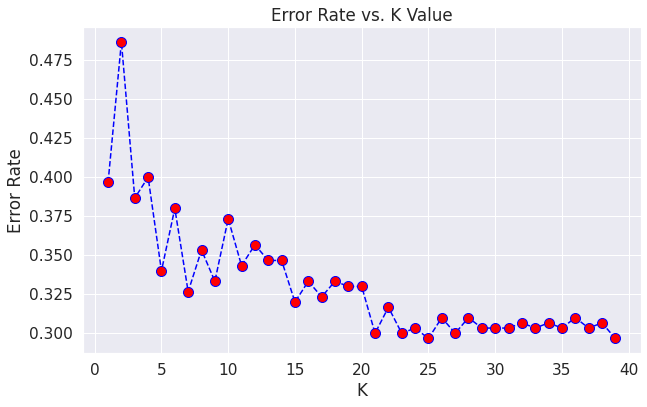

In [178]:
# The optimal K for KNN
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))



In [179]:
#Initiate the classifier with best N
classifier_1 = KNeighborsClassifier( n_neighbors= 24)

#feature selection for KNN
from mlxtend.feature_selection import SequentialFeatureSelector
ffs = SequentialFeatureSelector(classifier_1, k_features ='best', forward = True, n_jobs = -1)
ffs.fit(dc,dm['class_new'])
features = list(ffs.k_feature_names_)
print(features)
dt = dm[features]
X_train, X_test, y_train, y_test =train_test_split(dt,dm['class_new'],test_size = 0.30, random_state =42)
classifier_1.fit(X_train,y_train)
y_pred_1 = classifier_1.predict(X_test)
print(classification_report(y_test,y_pred_1))


['checking_status', 'savings_status', 'personal_status', 'parties_guarantor', 'parties_none', 'credit_h_all paid', 'credit_h_no credits/all paid', 'purpose_business', 'purpose_domestic appliance', 'purpose_other', 'purpose_retraining', 'purpose_used car', 'foreign_worker_new', 'job_status_unemp/unskilled non res', 'property_magnitude_status_life insurance', 'property_magnitude_status_real estate']
              precision    recall  f1-score   support

           0       0.67      0.54      0.60        91
           1       0.81      0.89      0.85       209

    accuracy                           0.78       300
   macro avg       0.74      0.71      0.72       300
weighted avg       0.77      0.78      0.77       300



Predicted   0    1
Actual            
0          49   42
1          24  185


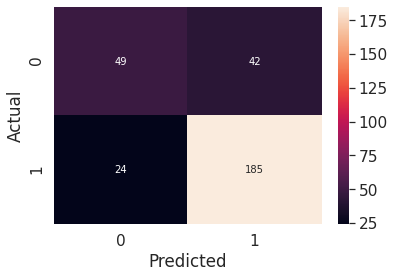

In [180]:
confusion_matrix = pd.crosstab(y_test,y_pred_1, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
#lable size
sns.set(font_scale=1.4)
#font size
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 10},fmt='g')



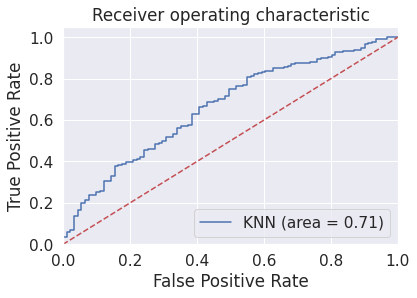

In [181]:
KNN_roc_auc = roc_auc_score(y_test, classifier_1.predict(X_test))
plt.figure()

plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [182]:
# GridSearch for KNN
k_range = list(range(1, 45))

param_grid = dict(n_neighbors=k_range)

GridModel_1 = GridSearchCV(KNeighborsClassifier(),param_grid, scoring='accuracy',return_train_score=True)
GridModel_1.fit(X_train, y_train)
print(GridModel_1)
KNN_predictions=GridModel_1.predict(X_test)


score1 =np.mean (GridModel_1.cv_results_['mean_test_score'])
print(score1)

score2 = np.mean(GridModel_1.cv_results_['mean_train_score'])
print(score2)

score3 = classifier_1.score(X_test,y_test)
print(score3)
#print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
GridModel_1.best_estimator_
# Mean absolute error
score4 = mean_absolute_error(y_test,y_pred)
print(score4)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)
0.7122402597402598
0.7574675324675323
0.78
0.3453161841495239


In [183]:
# Append for graphing 
groups.append('Knn')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
test_score.append(score3)
mae_score_test.append(score4)

In [184]:
#Initiate the classifier with best parameters
SVM_model = SVC()
#feature selection for KNN
from mlxtend.feature_selection import SequentialFeatureSelector
ffs = SequentialFeatureSelector(SVM_model, k_features ='best', forward = True, n_jobs = -1)
ffs.fit(dc,dm['class_new'])
features = list(ffs.k_feature_names_)
print(features)
dt = dm[features]
X_train, X_test, y_train, y_test =train_test_split(dt,dm['class_new'],test_size = 0.30, random_state =42)
SVM_model.fit(X_train,y_train)
y_pred = SVM_model.predict(X_test)
print(classification_report(y_test,y_pred))


['checking_status', 'savings_status', 'personal_status', 'parties_co applicant', 'parties_guarantor', 'parties_none', 'credit_h_all paid', 'credit_h_critical/other existing credit', 'credit_h_delayed previously', 'credit_h_no credits/all paid', 'purpose_domestic appliance', 'purpose_education', 'purpose_used car', 'property_magnitude_status_life insurance', 'property_magnitude_status_real estate']
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        91
           1       0.78      0.89      0.83       209

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.67       300
weighted avg       0.73      0.75      0.73       300



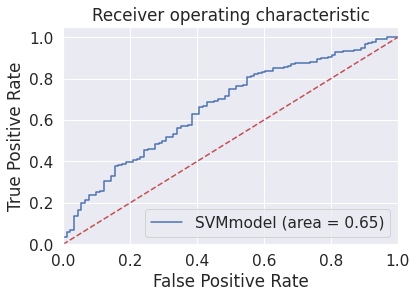

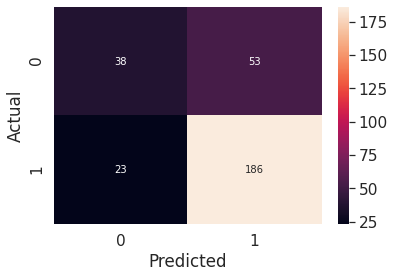

In [185]:
#ROC for SVM
SVM_roc_auc = roc_auc_score(y_test, SVM_model.predict(X_test))
plt.figure()

plt.plot(fpr, tpr, label='SVMmodel (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
#lable size
sns.set(font_scale=1.4)
#font size
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 10},fmt='g')



In [186]:
# Findout the best hypoparameter for SVC
# Create Required Dictionary 
parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
'C': [1,2,3,300,500],
'max_iter': [1000,100000]}]
#Instantiate grid search cv and pass the parameter
GridModel = GridSearchCV(SVC(), parameters, scoring='accuracy',return_train_score=True)
GridModel.fit(X_train, y_train)
# print the best parameters
print(GridModel.best_params_)
SVC_predictions=GridModel.predict(X_test)


# Reporting all the scores for the model
#Average CV test Score 
score1 =np.mean(GridModel.cv_results_['mean_test_score'])
print(score1)
#Average Cv train score
score2 = np.mean(GridModel.cv_results_['mean_train_score'])
print(score2)
# Test score 
score3 = SVM_model.score(X_test,y_test)
print(score3)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
GridModel.best_estimator_
# Mean absolute error
score4 = mean_absolute_error(y_test,y_pred)
print(score4)


{'C': 2, 'kernel': 'rbf', 'max_iter': 1000}
0.6568571428571428
0.7031517857142857
0.7466666666666667
Accuracy:  0.7466666666666667
0.25333333333333335


In [187]:
# Append for graphing 
groups.append('Lasso Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
test_score.append(score3)
mae_score_test.append(score4)

Text(0.5, 1.0, 'groups Comparision : Average CV Test Score')

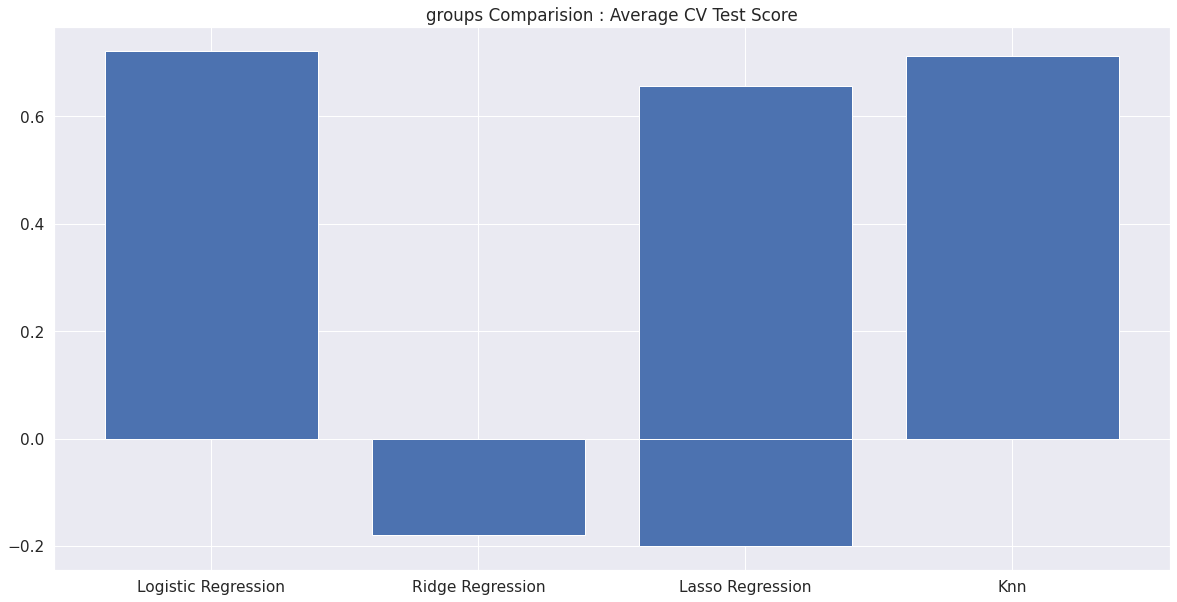

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(groups, mean_cv_test_score)
plt.title('groups Comparision : Average CV Test Score')

Text(0.5, 1.0, 'groups Comparision : Average CV Train Score')

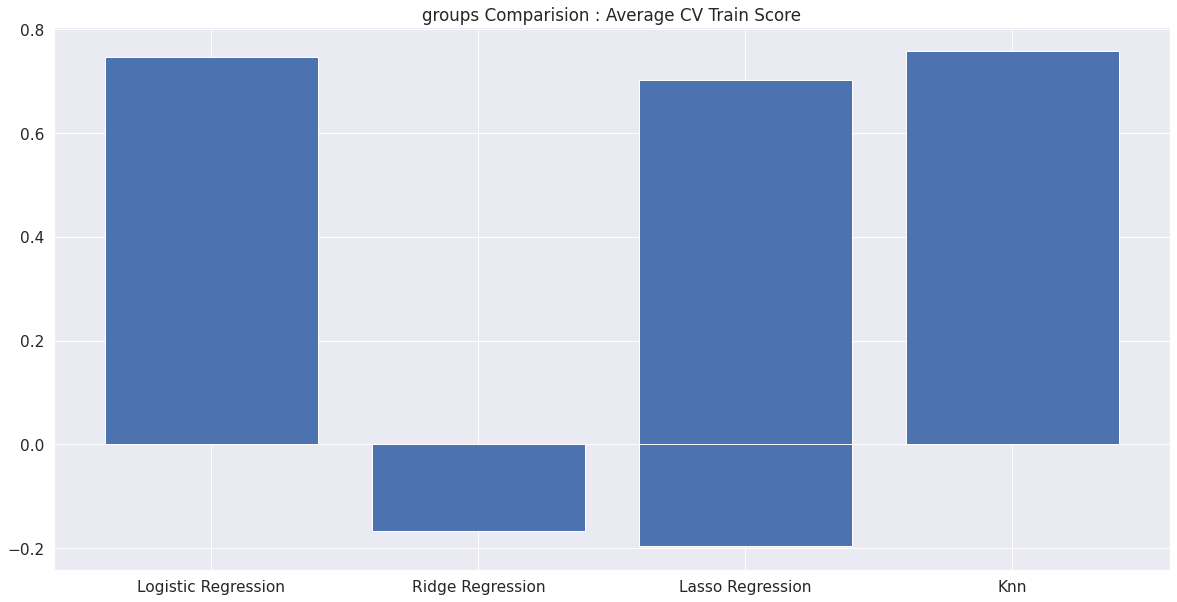

In [189]:
plt.figure(figsize=(20,10))

plt.bar(groups, mean_cv_train_score)
plt.title('groups Comparision : Average CV Train Score')

Text(0.5, 1.0, 'groups Comparision : Test Score')

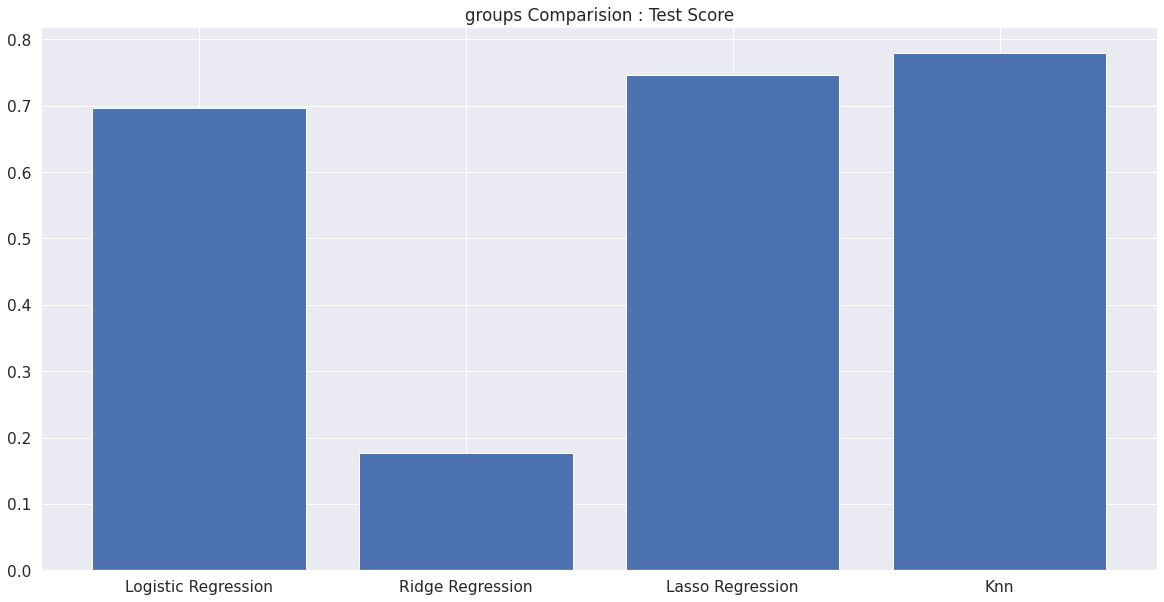

In [190]:
plt.figure(figsize=(20,10))

plt.bar(groups, test_score)
plt.title('groups Comparision : Test Score')

Text(0.5, 1.0, 'groups Comparision : Mean Absolute Error Test')

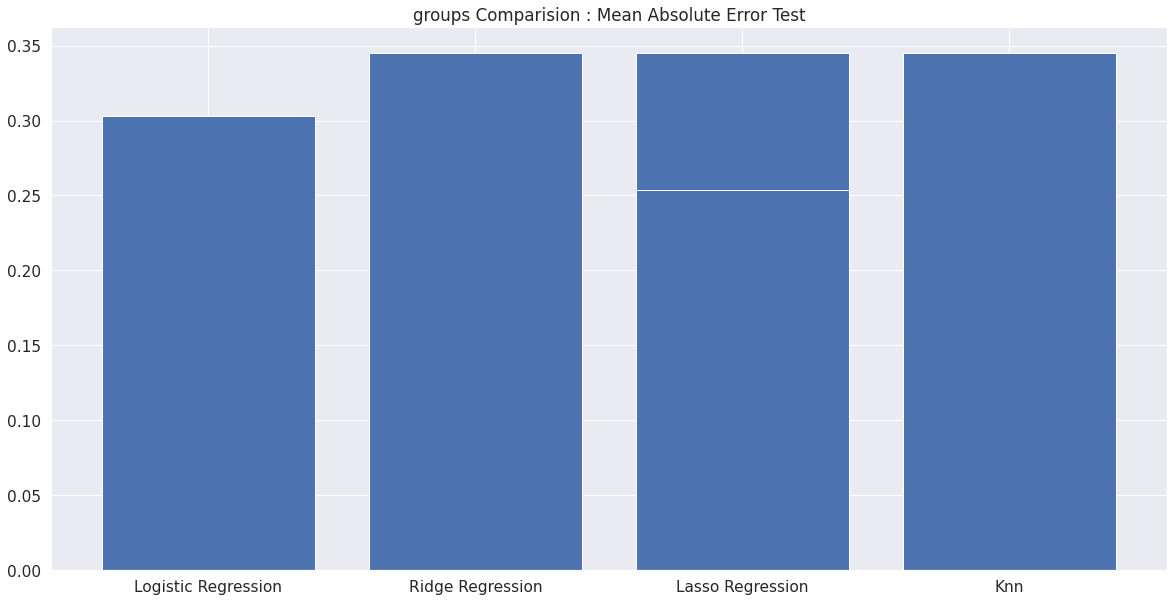

In [191]:
plt.figure(figsize=(20,10))

plt.bar(groups, mae_score_test)
plt.title('groups Comparision : Mean Absolute Error Test')